<h1 style="text-align: center;">Deep Learning Project</h1>

** **

## <p style="text-align: center;"><i>01 - Explore Data Analysis </i></p>

** **
<p style="text-align: center;">
David Cascão - 20240851 <br>
Jan-Louis Schneider - 20240506 <br>
Emir Kamiloglu - 20240945 <br>
Marta Boavida - 20240519 <br>
Sofia Gomes - 20240848
</p>


## <span style="color:#FF007F">  Notebook  </span> 

In this notebook, we do an initial exploration of the dataset. We start to see if there was incorrect data types, duplicates, missing values and outliers. After that we took a detailed look at all the folders and images in the respective. Finally, we split the data in train, test and validation.


## <span style="color:#FF007F"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Initial Exploration](#three-bullet) <br>

4. [Data Types](#four-bullet) <br>

5. [Duplicates](#five-bullet) <br>

6. [Missing Values](#six-bullet) <br>

7. [Outliers](#seven-bullet) <br>

8. [Visualization of Images](#eight-bullet) <br>

9. [Split the data](#nine-bullet) 

<a class="anchor" id="one-bullet"></a>

## <span style="color:#FF007F"> 1. Import Libraries</span>

The first step is to import the necessary libraries.

In [54]:
import pandas as pd
import numpy as np  
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math
from sklearn.model_selection import train_test_split
import seaborn as sns

<a class="anchor" id="two-bullet"> 

## <span style="color:#FF007F"> 2. Import Datasets</span> 

<a href="#top">Top &#129033;</a>

Next, we start by importing the dataset.

In [55]:
df = pd.read_csv('../data/metadata.csv')
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                               file_path  
0      mollusca_unionidae/12853737_449393_eol-full-si...  
1      chordata_geoemydidae/20969394_793083_eol-full-...  
2      chordata_cryptobranchidae/28895411_319982_eol-...  
3      chordata_turdidae/29658536_45510188_eol-full-s...  
4      chordata_indriidae/21252576_7250886_eol-full-s...  
...                                                  ...  
11978  chordata_leporidae/29734618_1011315_eol-full-s...  
11979  chordata_emydidae/29972861_1056842_eol-full-si...  
11980  chordata_dasyatidae/30134195_52572074_eol-full...  
11981  chordata_mustelidae/9474963_46559139_eol-full-...  
11982  chordata_lemuridae/9465817_326525_eol-full-siz...  

[11983 rows x 7 columns]

<a class="anchor" id="three-bullet"> 

## <span style="color:#FF007F"> 3. Initial Exploration</span> 

<a href="#top">Top &#129033;</a>

In order to better understand the dataset, we started by exploring it.


<span style="color:#FF007F"> 3.1. Get the first 10 rows of the dataset df </span> 

In [56]:
df.head(10)

rare_species_id  eol_content_id  eol_page_id  \
0  75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1  28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2  00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3  29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4  94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
5  dc48f2ce-4feb-4ef7-b2a2-c3c3f42bf19b        28657539       491832   
6  3d881320-8ba8-4580-a72c-0e7ab116b664        29548208     47043290   
7  7faca96a-54e6-4c80-b9e4-77ab126d904a        21232818      1033999   
8  9f89ecab-aabd-41a4-b5b4-8ce106d85959        20315204     46561012   
9  b6ec7a70-c470-4ede-8930-05844e1efd2e        20124498     46570095   

    kingdom      phylum            family  \
0  animalia    mollusca         unionidae   
1  animalia    chordata       geoemydidae   
2  animalia    chordata  cryptobranchidae   
3  animalia    chordata          turdidae   
4  animalia    chordata         indriidae   
5  animalia  arthropoda        formicidae   
6  animalia    chordata      fringillidae   
7  animalia  arthropoda         gomphidae   
8  animalia    chordata      myliobatidae   
9  animalia    chordata    pleuronectidae   

                                           file_path  
0  mollusca_unionidae/12853737_449393_eol-full-si...  
1  chordata_geoemydidae/20969394_793083_eol-full-...  
2  chordata_cryptobranchidae/28895411_319982_eol-...  
3  chordata_turdidae/29658536_45510188_eol-full-s...  
4  chordata_indriidae/21252576_7250886_eol-full-s...  
5  arthropoda_formicidae/28657539_491832_eol-full...  
6  chordata_fringillidae/29548208_47043290_eol-fu...  
7  arthropoda_gomphidae/21232818_1033999_eol-full...  
8  chordata_myliobatidae/20315204_46561012_eol-fu...  
9  chordata_pleuronectidae/20124498_46570095_eol-...

<span style="color:#FF007F"> 3.2. Get the shape of the dataset df </span> 

In [57]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 11983 rows and 7 columns.


<span style="color:#FF007F"> 3.3. Get information about the data types in each column </span> 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rare_species_id  11983 non-null  object
 1   eol_content_id   11983 non-null  int64 
 2   eol_page_id      11983 non-null  int64 
 3   kingdom          11983 non-null  object
 4   phylum           11983 non-null  object
 5   family           11983 non-null  object
 6   file_path        11983 non-null  object
dtypes: int64(2), object(5)
memory usage: 655.4+ KB


**Conclusions:**
- There are 2 numerical columns (int64) and 5 categorical columns (object)

<span style="color:#FF007F"> 3.4. Some statistics about all the columns </span> 

In [59]:
df.describe()

eol_content_id   eol_page_id
count    1.198300e+04  1.198300e+04
mean     2.297681e+07  2.112247e+07
std      6.999289e+06  2.241319e+07
min      4.750000e+02  1.180080e+05
25%      2.058937e+07  7.954560e+05
50%      2.251368e+07  2.865857e+06
75%      2.932887e+07  4.551773e+07
max      3.061946e+07  5.269200e+07

**Conclusions:**
1. The column "eol_content_id" 
    - start in 475 (very low - might be worth checking for anomalies or special cases) and finish at ~30.62 million
    - the mean is ~22.98 million and the median is ~22.51 million

2. The column "eol_page_id" 
    - start in 118,008 and finish at ~52.69 million
    - the mean is ~21.12 million and the median is ~2.87 million. This suggest that there is outliers 

<span style="color:#FF007F"> 3.5. Types of phylum </span> 

In [60]:
print("Phylum counts:")
df['phylum'].value_counts()

Phylum counts:


phylum
chordata         9952
arthropoda        951
cnidaria          810
mollusca          210
echinodermata      60
Name: count, dtype: int64

**Conclusions:**
- We can see that we have 5 different types: chordata, arthropoda, cnidaria, mollusca and echinodermata

<span style="color:#FF007F"> 3.6. Family Tree of our Metadata </span> 

In [61]:
df_clean = df[['phylum', 'family']].dropna().drop_duplicates()

# Criar estrutura hierárquica
df_clean['root'] = 'Family Tree'  # raiz da árvore

# Construir a árvore com Plotly Treemap
fig = px.treemap(df_clean,
                 path=['root', 'phylum', 'family'],
                )

fig.show()

**Conclusions:**
- After analyse this graphic, we can conclude that:
    - chordata has 166 unique species
    - arthropoda has 17 unique species
    - cnidaria has 13 unique species
    - mollusca has 5 unique species
    - echinodermata has 1 unique specie
- The total families are 202

<a class="anchor" id="four-bullet"> 

## <span style="color:#FF007F"> 4. Data types</span> 

<a href="#top">Top &#129033;</a>


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rare_species_id  11983 non-null  object
 1   eol_content_id   11983 non-null  int64 
 2   eol_page_id      11983 non-null  int64 
 3   kingdom          11983 non-null  object
 4   phylum           11983 non-null  object
 5   family           11983 non-null  object
 6   file_path        11983 non-null  object
dtypes: int64(2), object(5)
memory usage: 655.4+ KB


We notice that there is no incorrect data types.

<a class="anchor" id="five-bullet"> 

## <span style="color:#FF007F"> 5. Duplicates</span> 

<a href="#top">Top &#129033;</a>


The next step was to check if exists duplicates in this dataset

In [63]:
print(f'There are {df.duplicated().sum()} duplicated rows')

There are 0 duplicated rows


As we can see, there are no duplicates

<a class="anchor" id="six-bullet"> 

## <span style="color:#FF007F"> 6. Missing Values</span> 

<a href="#top">Top &#129033;</a>


This next step is to make sure that we don´t have missing values

In [64]:
missing_values = df.isnull().sum() / len(df) * 100
print("Missing values (in %):")
print(missing_values)

Missing values (in %):
rare_species_id    0.0
eol_content_id     0.0
eol_page_id        0.0
kingdom            0.0
phylum             0.0
family             0.0
file_path          0.0
dtype: float64


<a class="anchor" id="seven-bullet"> 

## <span style="color:#FF007F"> 7. Outliers </span> 

<a href="#top">Top &#129033;</a>

In this step, we will search for outliers in the folders:

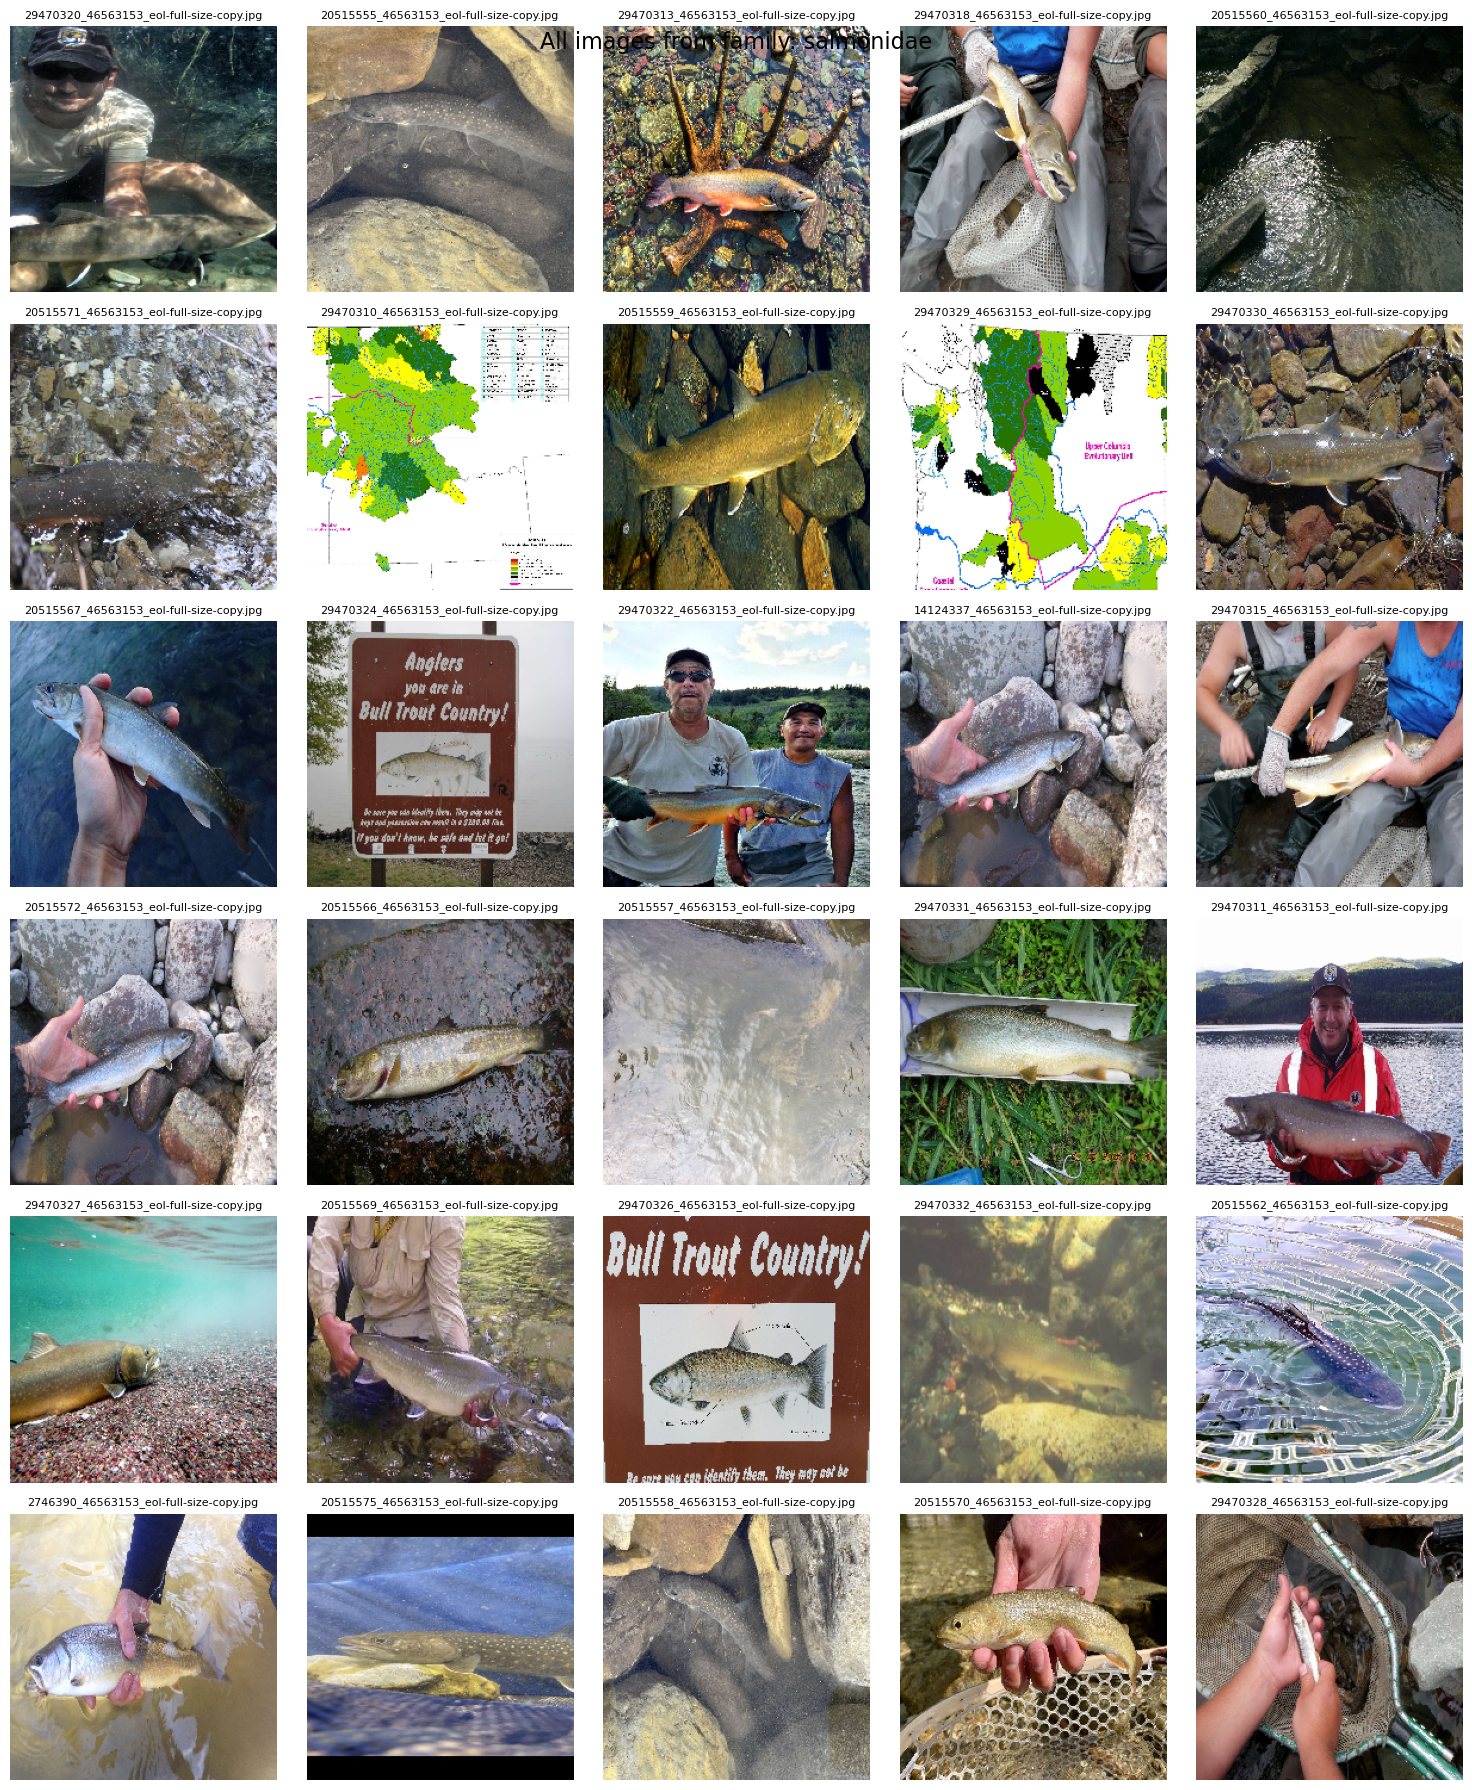

In [65]:
image_root = "../data/"
target_family = "salmonidae"
family_df = df[df['family'] == target_family]
n_images = len(family_df)
cols = 5
rows = math.ceil(n_images / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
axes = axes.flatten()

for i, (_, row) in enumerate(family_df.iterrows()):
    full_path = os.path.join(image_root, row["file_path"])
    try:
        img = tf.keras.utils.load_img(full_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].set_title(os.path.basename(row["file_path"]), fontsize=8)
        axes[i].axis("off")
    except Exception as e:
        print(f"Could not load image {full_path}: {e}")
        axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle(f"All images from family: {target_family}", fontsize=16)
plt.show()

**Conclusions:**
- As we can see, exists some outliers that can be threat. In this specific example, we have the specie chordata_salmonidae in most of the images, but exits 2 images of maps (this 2 images are an outlier)

<a class="anchor" id="eight-bullet"> 

## <span style="color:#FF007F"> 8. Visualization of Images</span> 

<a href="#top">Top &#129033;</a>

In order to understand image diversity and quality of the image, above we have 5 images of 3 different families.

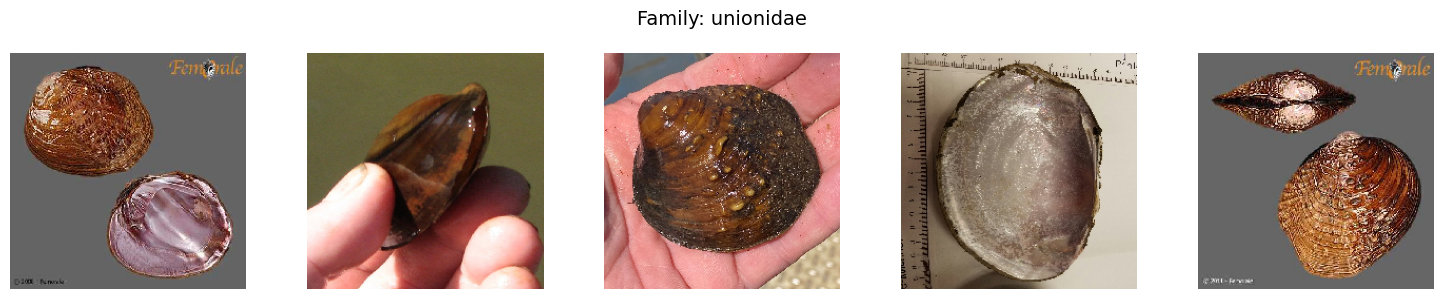

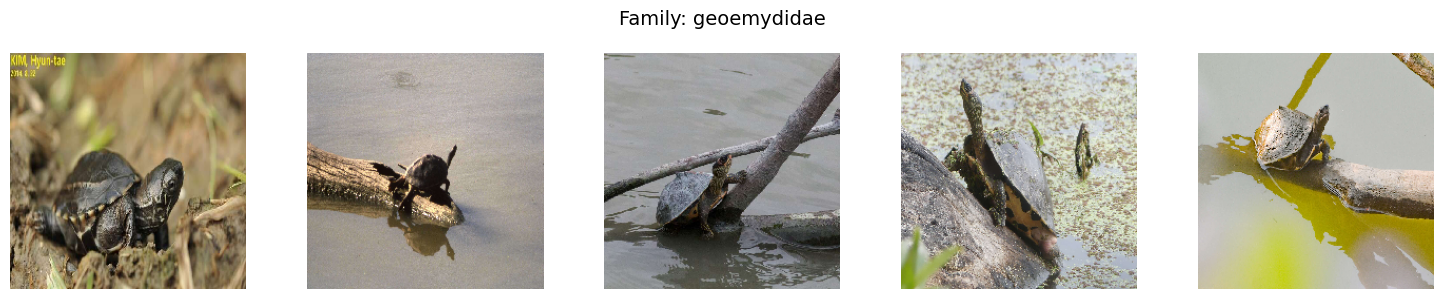

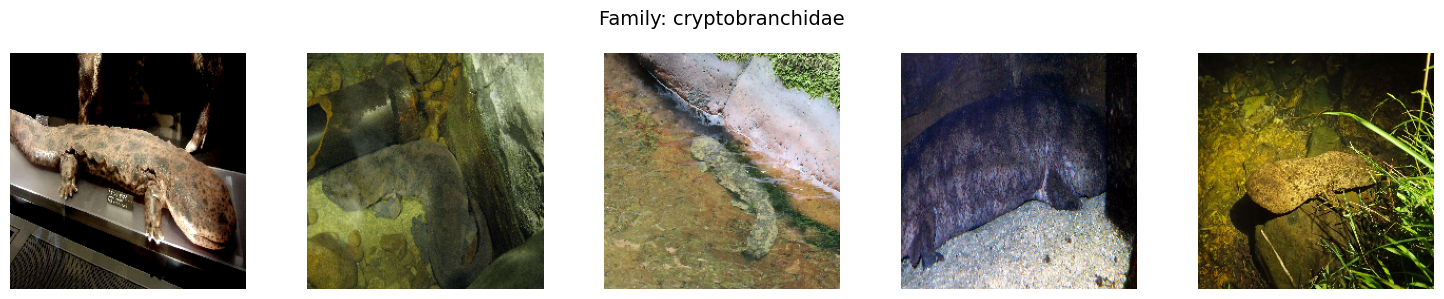

In [66]:
# Definir o diretório onde estão armazenadas as imagens
image_root = "../data/"  

# Ver 5 imagens de 3 famílias diferentes
families_to_show = df["family"].unique()[:3]

for family in families_to_show:
    sample_paths = df[df["family"] == family]["file_path"].sample(5, random_state=42)

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(f"Family: {family}", fontsize=14)

    for i, rel_path in enumerate(sample_paths):
        full_path = os.path.join(image_root, rel_path)
        try:
            img = tf.keras.utils.load_img(full_path, target_size=(224, 224))
            axes[i].imshow(img)
            axes[i].axis("off")
        except Exception as e:
            print(f"Could not load image {full_path}: {e}")
            axes[i].axis("off")

    plt.tight_layout()
    plt.show()

To see the distibution of species by family:

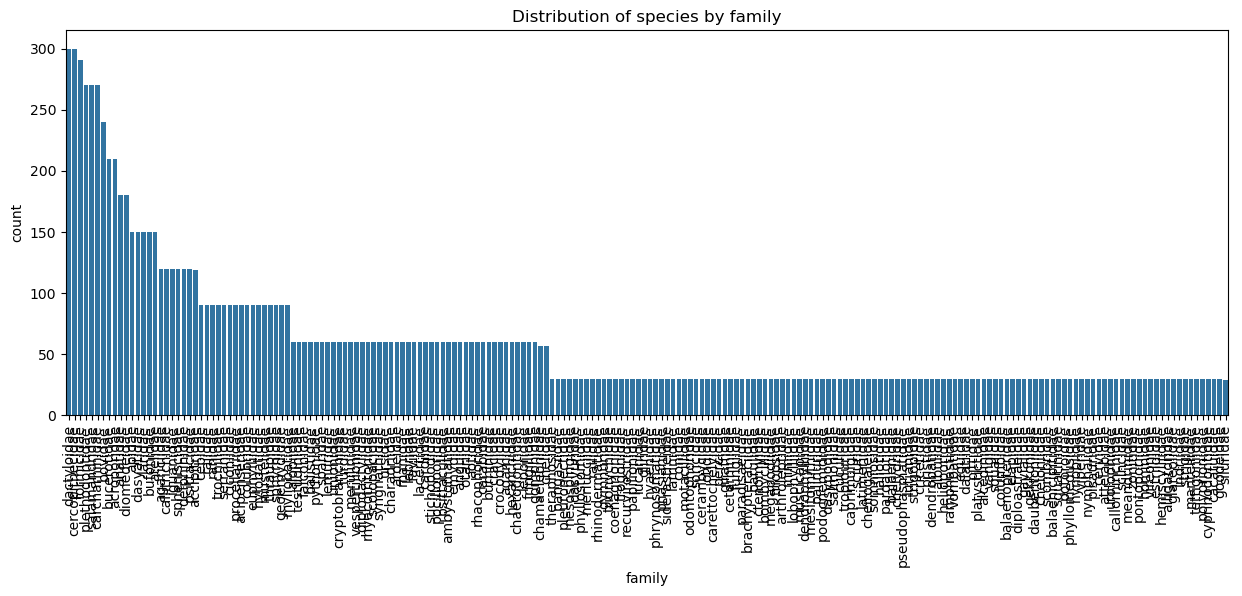

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="family", order=df["family"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of species by family")
plt.show()

<a class="anchor" id="nine-bullet"> 

## <span style="color:#FF007F"> 9. Split the data</span> 

<a href="#top">Top &#129033;</a>

Finally, the last step was split the data into 70% train, 15% validation and 15% test.

We decided split the data this way because:
- Our dataset contains 202 distinct species families, many of which have a relatively small number of image samples. Using 70% for training ensures that the model is exposed to the maximum possible variation in the data, which is especially important for rare or underrepresented classes.
- The 15% reserved for validation provides a sufficiently large and representative sample to evaluate different model architectures, tune hyperparameters, and apply techniques like early stopping. A smaller validation set could lead to unstable results and poor model selection.
- The final 15% used as a test set allows for a fair and robust evaluation of the model’s generalization performance. It is large enough to provide statistically reliable performance metrics and prevents performance overestimation.
- We applied stratified splitting to ensure that all three subsets — training, validation, and test — preserve the same class distribution. This is crucial in a multi-class problem with imbalanced data, as it ensures that no family is over- or under-represented in any split.

In [68]:
# First split into train and temp (val + test)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["family"], random_state=42)

# Then split temp into validation and test
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["family"], random_state=42)

In [69]:
print("Train distribution:")
print(train_df["family"].value_counts(normalize=True).head())
print("\n")
print("Validation distribution:")
print(val_df["family"].value_counts(normalize=True).head())
print("\n")
print("Test distribution:")
print(test_df["family"].value_counts(normalize=True).head())

Train distribution:
family
dactyloidae        0.025036
cercopithecidae    0.025036
formicidae         0.024320
salamandridae      0.022532
carcharhinidae     0.022532
Name: proportion, dtype: float64


Validation distribution:
family
cercopithecidae    0.025042
dactyloidae        0.025042
formicidae         0.023929
salamandridae      0.022259
carcharhinidae     0.022259
Name: proportion, dtype: float64


Test distribution:
family
cercopithecidae    0.025028
dactyloidae        0.025028
formicidae         0.024472
carcharhinidae     0.022803
salamandridae      0.022803
Name: proportion, dtype: float64


<a class="anchor" id="ten-bullet"> 

## <span style="color:#FF007F"> 10. Export splits datasets</span> 

<a href="#top">Top &#129033;</a>

In [70]:
train_df.to_csv("../data/train_df.csv", index=False)
val_df.to_csv("../data/val_df.csv", index=False)
test_df.to_csv("../data/test_df.csv", index=False)